# Example on using relagn to create an SED
We will start by creating and plotting the SED corresponding to the model defualts (i.e defualt input parameters, and output units)

We will then play around with the output units and some parameters to see what happens

In [1]:
#Importing packages
import numpy as np
import matplotlib.pyplot as plt

#adding relagn to pythonpath
import os
import sys
mdir = os.path.abspath('.')
mdir = mdir.replace('/examples', '/src/python_version')
sys.path.append(mdir)

from relagn import relagn

 idre: initializing data tables, please wait...
       Ref.: Dovciak M., Karas V. & Yaqoob T.
             ApJS July 2004, Volume 153, Issue 1, pp. 205-221
       ------------------------------------------------------
        ...initializing finished


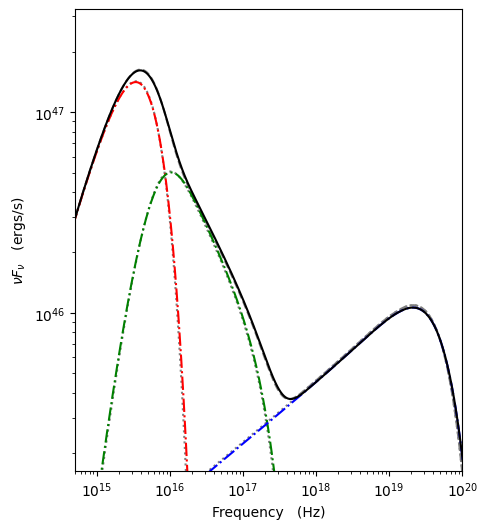

In [2]:
dagn = relagn(a=0.0, cos_inc=0.5, log_mdot = 0.5, M=1E9) #Default params, so no need to pass additional arguments. See the docs for defualt values

#Now extracting both relativistic and non-relativistic specrta
Lnu_rel = dagn.get_totSED(rel=True)
Lnu_nr = dagn.get_totSED(rel=False)

#Also extracting the spectral components (these are stored within the object when totSED is calculated)
#Hence no additional calculations needed!!!

#relativistic components
Lrel_dsc = dagn.get_DiscComponent()
Lrel_wrm = dagn.get_WarmComponent()
Lrel_hot = dagn.get_HotComponent()

#non-relativistic components
Lnr_dsc = dagn.get_DiscComponent(rel=False)
Lnr_wrm = dagn.get_WarmComponent(rel=False)
Lnr_hot = dagn.get_HotComponent(rel=False)

#And now plotting. The output will be a single panel, containing both relativistic and non-relativistic SEDs
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)

nu = dagn.nu_obs #frequency grid
#plotting non-rel components first
ax.loglog(nu, nu*Lnr_dsc, ls='dotted', color='grey')
ax.loglog(nu, nu*Lnr_wrm, ls='dotted', color='grey')
ax.loglog(nu, nu*Lnr_hot, ls='dotted', color='grey')

ax.loglog(nu, nu*Lnu_nr, ls='dashed', color='grey')

#now doing rel components (in colour)
ax.loglog(nu, nu*Lrel_dsc, ls='-.', color='red')
ax.loglog(nu, nu*Lrel_wrm, ls='-.', color='green')
ax.loglog(nu, nu*Lrel_hot, ls='-.', color='blue')

ax.loglog(nu, nu*Lnu_rel, color='k')


ax.set_ylim(max(nu*Lnu_nr)*1e-2, max(nu*Lnu_nr)*2)
ax.set_xlim(5e14, 1e20)

ax.set_xlabel('Frequency   (Hz)')
ax.set_ylabel(r'$\nu F_{\nu}$   (ergs/s)')
plt.show()